<a href="https://colab.research.google.com/github/jumafernandez/dsI/blob/main/entregas/primer-entrega/DSI_Primer_entrega_ejemplo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Abstract**

La base de datos analizada corresponde a un catálogo de galaxias de un cúmulo de galaxias, creado a partir de la simulación Millenium I y un modelo semi-analítico. Trabajando de esta forma, se busca reproducir las condiciones de formación y evolución del Universo en base al modelo astrofísico actualmente aceptado.
Las simulaciones son una herramienta muy poderosa y utilizada en la astrofísica porque nos permiten entender y analizar ciertos parámetros físicos. Además, las muestras que se obtienen a partir estos métodos son representativas para realizar análisis estadísticos confiables, y así podemos comparar los resultados de bases de datos simuladas con resultados que se obtienen a partir de imágenes astronómicas reales que suelen tener una menor cantidad de elementos.


Un cúmulo de galaxias es una estructura compuesta por cientos a miles de galaxias, unidas gravitacionalmente, y que presentan
características físicas que nos ayudan a entender la evolución y el comportamiento de la materia en el Universo.
Un ejemplo esclarecedor puede ser la Vía Láctea. Nuestra galaxia está compuesta por aproximadamente 100 mil millones de estrellas.
A su vez, la Vía Láctea integra el llamado Grupo Local, un grupo de unas 40 galaxias. El grupo local cuenta con la Vía Láctea, Andromeda
y M33 como galaxias masivas principales y el resto corresponden a galaxias satélites (más pequeñas). El Grupo Local no llega a ser un cúmulo de galaxias porque no cuenta con la cantidad de miembros suficientes y porque tampoco cumple con ciertas características astrofísicas que también definen lo que es un cúmulo.



# **Preguntas e hipótesis de interés**

1) Analizar cómo es la distribución espacial de galaxias y ver que cumpla con la teoría de ser una aglomeración quasi-esférica que va disminuyendo en número de galaxias en la medida en que nos alejamos de su centro.

2) ¿Hay alguna relación entre la magnitud de las galaxias y la masa de las estrellas que cada galaxia tiene?

3) Un análisis interesante puede ser trabajar con la morfología de las galaxias. A grandes razgos, tenemos galaxias elípticas (tipo Andrómeda) y galaxias espirales (como la Vía Láctea). Las galaxias rojas suelen corresponder a galaxias elípticas, mientras que las galaxias azules suelen corresponder a galaxias espirales.

*   Analizar los dos tipos morfológicos dentro del cúmulo.
*   ¿Hay alguna relación entre la masa estelar y la masa virial (masa de la materia observada) con las magnitudes para cada tipo morfológico?







# Análisis exploratorio de datos

Primero realizamos un análisis exploratorio de la muestra de datos. Este cúmulo de galaxias simulado contiene 2016 galaxias. Tenemos varios parámetros de interés: las posiciones (x, y, z) que denorán la ubicación espacial de cada galaxia, las velocidades de las galaxias en cada dirección (vx, vy, vz), la distancia al centro del cúmulo (r),la masa estelar de cada galaxia (mstar) expresada en unidades de masa solar, la masa del bulbo mbulge (masa de la parte central de las galaxias), la masa virial mvir (masa total de materia visible) y las magnitudes (es una forma de medir qué tan brillante es una galaxia) en dos filtros (magg y magr).

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')





Mounted at /content/gdrive


In [ ]:
#Importanmos las librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt  # Importa la función pyplot desde el módulo matplotlib con el alias plt para su uso en el código.
from sklearn import datasets          # Importa el módulo datasets desde la librería sklearn para cargar conjuntos de datos predefinidos.
from sklearn.tree import DecisionTreeClassifier  # Importa la clase DecisionTreeClassifier desde el módulo tree dentro de la librería sklearn para utilizar un árbol de decisión.
from sklearn import tree
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#--- Leemos el conjunto de datos

data = pd.read_csv('/content/gdrive/MyDrive/DATA SCIENCE I - TUTOR - 2024/TANIA AGUIRRE/DLB07_preproject.dat',delimiter=',')

data.head()



,ngal,x,y,z,r,vx,vy,vz,mstar,mvir,mbulge,magg,magr
0,1,-0.400,0.112,-1.360,1.422,-116.152,347.398,1396.637,0.264,3.065,0.0,-16.925,-17.679
1,2,-0.099,-0.087,-0.585,0.600,-4.521,-2675.145,-1285.704,0.187,4.009,0.0,-16.512,-17.280
2,3,-0.162,-0.283,0.646,0.723,-61.448,-467.275,906.527,0.120,2.712,0.0,-16.068,-16.825
3,4,-0.165,0.724,0.114,0.751,-454.766,2311.390,-153.633,0.162,1.061,0.0,-16.646,-17.355
4,5,-0.192,-0.604,0.387,0.742,706.291,1117.466,948.637,0.199,5.541,0.0,-16.069,-16.941


In [ ]:

#--- Valores nulos

print('Valores nulos del conjunto de datos')
print(pd.isnull(data).sum())



Valores nulos del conjunto de datos
ngal      0
x         0
y         0
z         0
r         0
vx        0
vy        0
vz        0
mstar     0
mvir      0
mbulge    0
magg      0
magr      0
dtype: int64


In [ ]:
data.describe()

,ngal,x,y,z,r,vx,vy,vz,mstar,mvir,mbulge,magg,magr
count,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,1008.500000,0.076083,-0.070521,-0.191171,1.433587,-0.000008,0.000002,-0.000002,0.562019,5.592598,0.247932,-17.520976,-18.246594
std,582.113391,0.822218,0.975625,0.954598,0.728201,1380.763285,1328.242425,1735.572451,0.607174,5.847926,0.457309,1.002832,0.984800
min,1.000000,-2.510000,-2.747000,-2.750000,0.023000,-4188.627000,-4032.156000,-4210.842000,0.100000,1.061000,0.000000,-20.735000,-21.027000
25%,504.750000,-0.378000,-0.733000,-0.872250,0.854750,-855.755250,-848.066750,-1225.592000,0.169000,2.712000,0.000000,-18.268250,-18.977250
50%,1008.500000,0.053500,0.001000,-0.149500,1.402000,98.848500,-4.671500,45.189000,0.313000,3.419000,0.032500,-17.415000,-18.129500
75%,1512.250000,0.565500,0.635000,0.415250,2.005250,917.670000,889.071750,1141.213750,0.714250,5.777000,0.263500,-16.723500,-17.466000
max,2016.000000,2.775000,2.705000,2.670000,2.869000,4302.750000,4141.213000,4586.343000,3.123000,83.590000,3.112000,-14.881000,-15.812000


Exploremos un poco más nuestros datos

In [ ]:
#Veamos los coeficientes de correlación entre las vaiables

data.corr()

,ngal,x,y,z,r,vx,vy,vz,mstar,mvir,mbulge,magg,magr
ngal,1.000000,-0.026318,0.013625,-0.016332,0.050366,0.023658,0.006777,0.024793,0.413186,0.220271,0.349095,-0.366071,-0.372587
x,-0.026318,1.000000,-0.104656,-0.047442,0.083514,-0.213612,0.079535,-0.094823,-0.033789,-0.056143,-0.005733,0.061217,0.058685
y,0.013625,-0.104656,1.000000,-0.184936,-0.118162,0.145906,-0.149726,-0.089344,0.026279,0.040727,-0.010791,-0.011599,-0.013287
z,-0.016332,-0.047442,-0.184936,1.000000,-0.122611,-0.183216,0.085634,0.056385,-0.012222,-0.025269,0.011634,0.012785,0.014953
r,0.050366,0.083514,-0.118162,-0.122611,1.000000,-0.039342,0.008433,-0.087318,0.009242,0.204535,-0.034856,-0.164026,-0.140052
vx,0.023658,-0.213612,0.145906,-0.183216,-0.039342,1.000000,-0.111644,-0.170288,0.038946,0.009448,0.026357,-0.012462,-0.017457
vy,0.006777,0.079535,-0.149726,0.085634,0.008433,-0.111644,1.000000,-0.034428,-0.011743,-0.021726,-0.003949,-0.012286,-0.008968
vz,0.024793,-0.094823,-0.089344,0.056385,-0.087318,-0.170288,-0.034428,1.000000,0.029276,-0.000587,0.015247,-0.001828,-0.004306
mstar,0.413186,-0.033789,0.026279,-0.012222,0.009242,0.038946,-0.011743,0.029276,1.000000,0.519479,0.856269,-0.791664,-0.826155
mvir,0.220271,-0.056143,0.040727,-0.025269,0.204535,0.009448,-0.021726,-0.000587,0.519479,1.000000,0.195601,-0.485927,-0.488652


<Axes: >

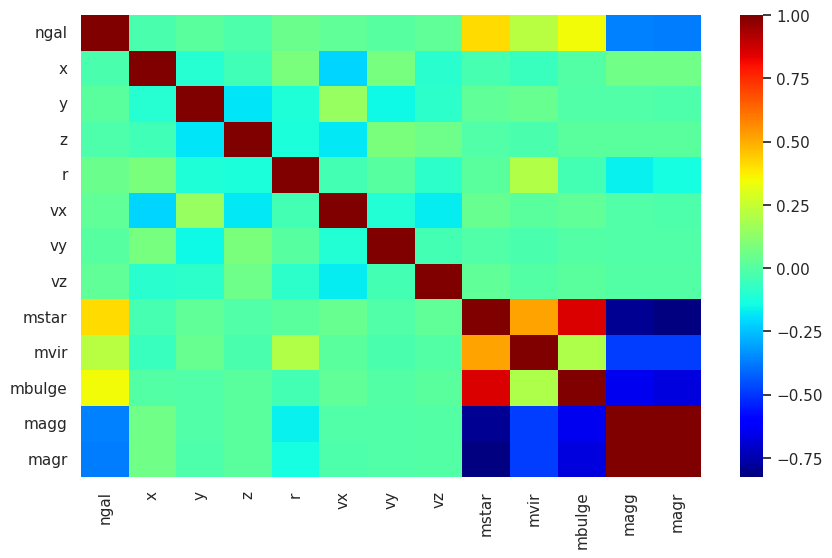

In [ ]:
#Veamos ahora los mismos coeficientes de correlación representados gráficamente
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), cmap='jet')

Text(0.5, 0, '$M_{star}$')

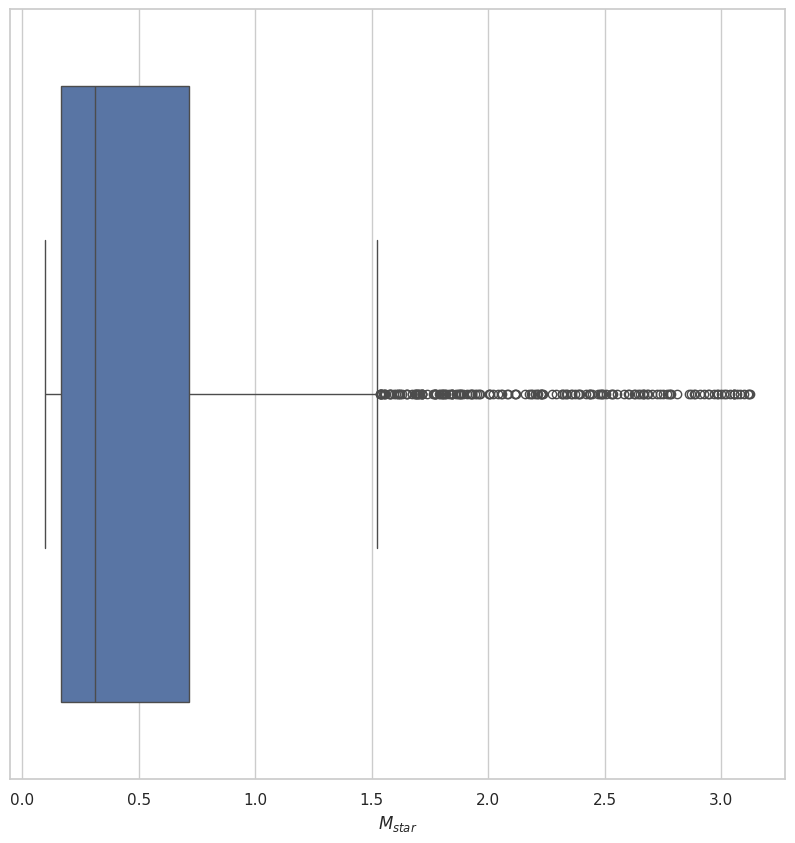

In [ ]:
#Analicemos ouliers de las variables de interés

#mstar
sns.set_theme(style='whitegrid')  # Establecemos el estilo del gráfico

# Axis-level
ax = sns.boxplot(x=data['mstar'])  # Creamos el boxplot utilizando la función boxplot de Seaborn
plt.xlabel('$M_{star}$')




In [ ]:
#Veamos la cantidad de outliers que tiene esta variable, mstar

#Para eso vamos a calcular el percentil Q1 y Q3
mstar = data['mstar']
q1    = np.percentile(mstar, 25)
q3    = np.percentile(mstar, 75)

#definimos el tamaño de la caja como
q31   = q3-q1

mask_mstar = mstar < q3 + 2*q31 #con esta máscara definimos los valores inliers

print('La cantidad de outliers de esta variables es de:',len(mstar[~mask_mstar]))




La cantidad de outliers de esta variables es de: 122


Finalmente, vemos que para nuestra variable de interés $M_{star}$ tenemos 122 outliers. Dado que 122 es un número pequeño frente al tamaño de la muestra, 2016 elementos, estadísticamente estos valores no cambiarán las tendencias que se observen en los gráficos. Es por ello que decidimos no remover estos outliers.

# 1) Distribución espacial de las galaxias del cúmulo.

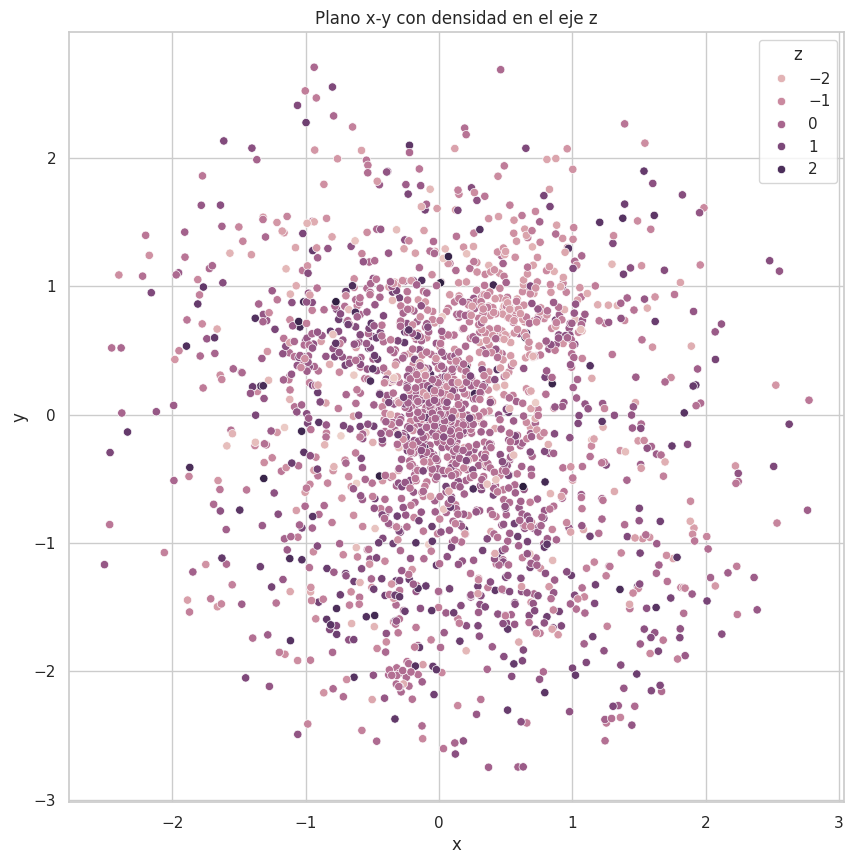

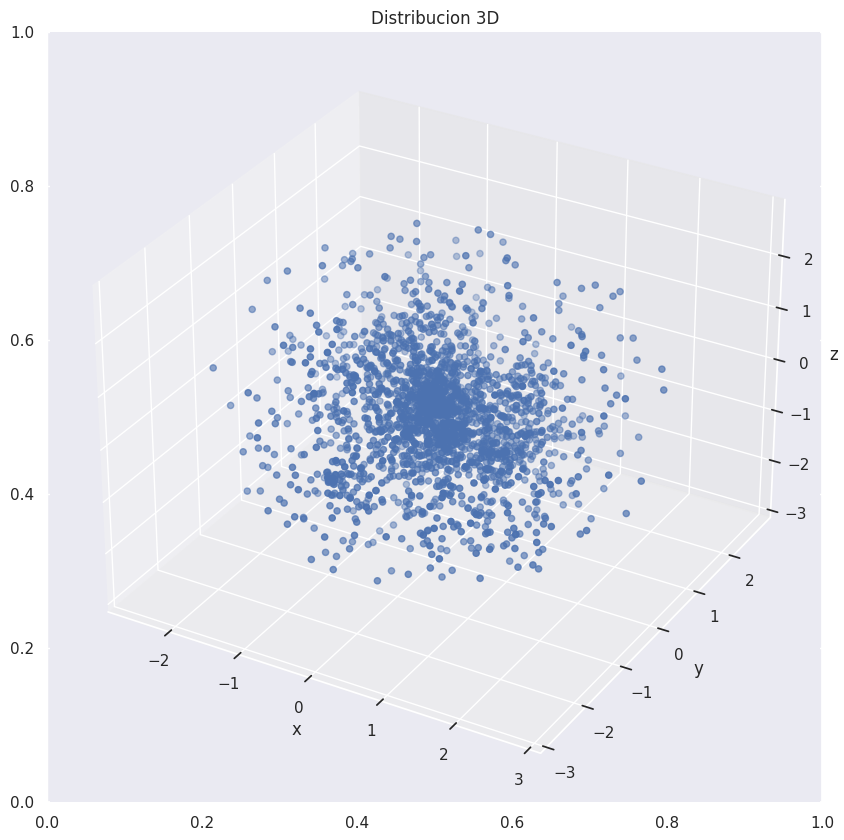

In [ ]:
# Primero queremos ver cómo es la distribución de galaxias en el espacio. La teoría indica que deberías ser quasi esférica.


#En este gráfico veremos cómo están distruibuidas en el plano (x,y) con una noción de profundidad en z usando la función hue

fig = plt.figure()
sns.scatterplot(data,x='x',y='y',hue='z')
plt.title('Plano x-y con densidad en el eje z')


#Ahora podemos ver cómo es la distribución 3D general

sns.set(style = "darkgrid")

fig = plt.figure()
plt.title('Distribucion 3D')
ax = fig.add_subplot(111, projection = '3d',alpha=0.25)

x = data['x']
y = data['y']
z = data['z']

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.scatter(x, y, z)


# 2) ¿Hay alguna relación entre la magnitud de las galaxias y la masa de las estrellas que cada galaxia tiene?

A partir de los coeficientes de correlación analizados anteriormente podemos ver que hay variables que tienden a estar más cerca de estar relacionada, como es el caso de la magnitud r ($mag_r$) y la masa estelar ($M_{star}$).


Text(0, 0.5, '$M_{star}/[M_{\\odot}]$')

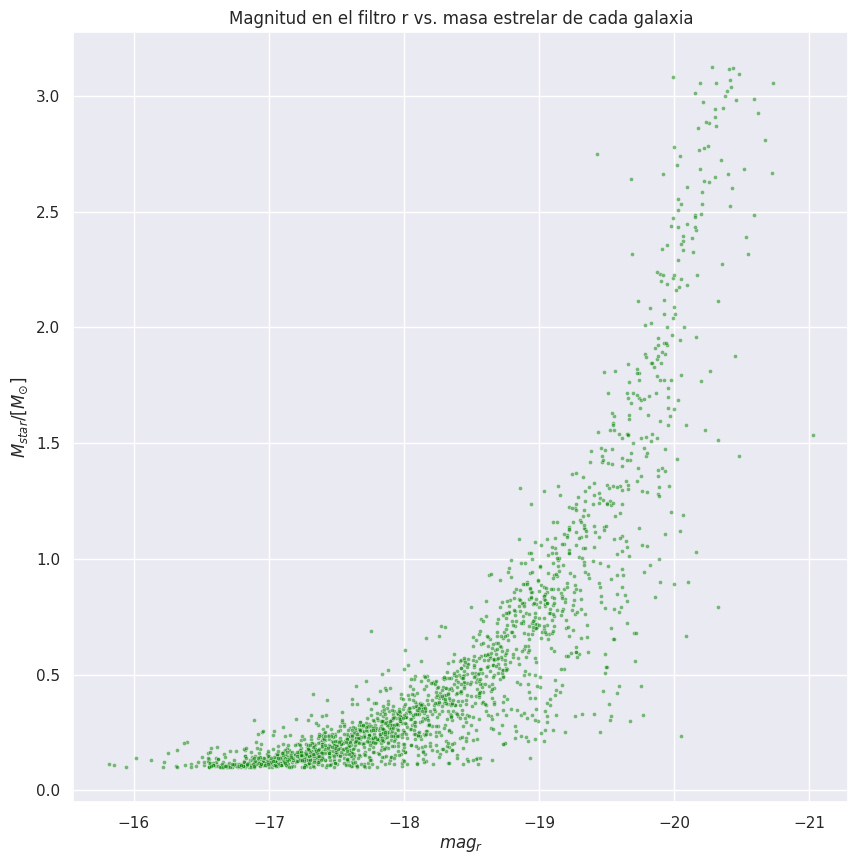

In [ ]:
#Comenzamos graficando. "mstar" o como llamaremos en los gráficos $M_{star}$ es la cantidad de masa estelar que tiene cada galaxia.
# mag_r será el nombre que le daremos a la magnitud r (magr)

mag_r = data['magr']
mstar = data['mstar']

sns.scatterplot(data,x=mag_r,y=mstar,color='green',marker='.',alpha=0.5)
plt.title('Magnitud en el filtro r vs. masa estrelar de cada galaxia')
#Observación: en la siguiente línea invierto el eje x porque es más fácil de visualzar desde la parte astrofísica. Es esto es,
#valore más negativos de la variable mag_r simbolizan galaxias más brillantes. En astronomía se suele graficar de esta forma estos casos
plt.gca().invert_xaxis()
plt.xlabel('$mag_{r}$')
plt.ylabel('$M_{star}/[M_{\odot}]$')


El gráfico anterior tiene bastante dispersión en mstar para los valores más chicos de $mag_r$. Como además tiene un forma similar a una función exponencial, vamos a reescalar y tomar al eje y=log(mstar).

(-1.0, 1.0)

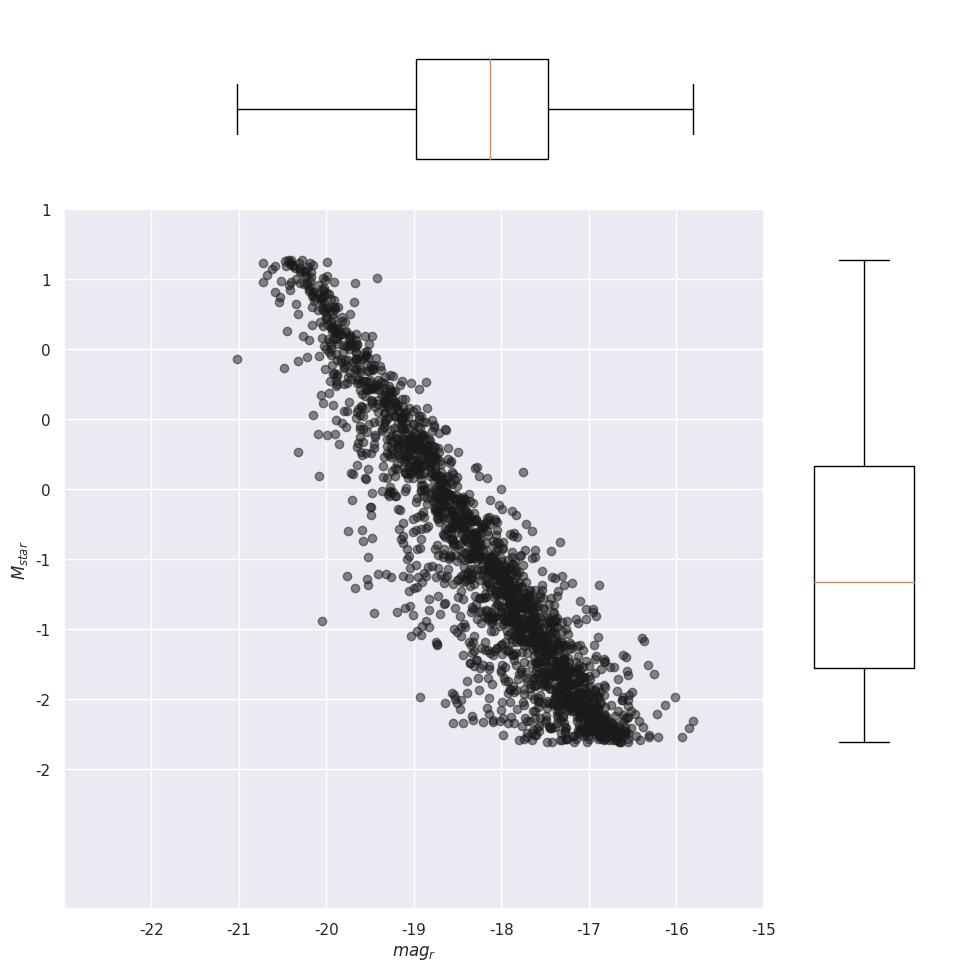

In [ ]:
#Graficaremos mag_r vs. log(mstar) y veremos además los gráficos de bigote para esta relación.

plt.rcParams["figure.figsize"] = (10,10)

x_data = mag_r
y_data = np.log(mstar) #tomamos el logaritmo para una mejor visualización de los datos

df = pd.DataFrame()
df['vcnt'] = x_data
df['ecnt'] = y_data

left = 0.1
bottom = 0.1
top = 0.8
right = 0.8
main_ax = plt.axes([left,bottom,right-left,top-bottom])
# create axes to the top and right of the main axes and hide them
top_ax = plt.axes([left,top,right - left,1-top])
plt.axis('off')
right_ax = plt.axes([right,bottom,1-right,top-bottom])
plt.axis('off')
main_ax.plot(df['vcnt'],  df['ecnt'], 'ko', alpha=0.5)
# Save the default tick positions, so we can reset them..

tcksx = main_ax.get_xticks()
tcksy = main_ax.get_yticks()

right_ax.boxplot(df['ecnt'], positions=[0], notch=False, widths=1.)
top_ax.boxplot(df['vcnt'], positions=[0], vert=False, notch=False, widths=1.)

main_ax.set_yticks(tcksy) # pos = tcksy
main_ax.set_xticks(tcksx) # pos = tcksx
main_ax.set_yticklabels([int(j) for j in tcksy])
main_ax.set_xticklabels([int(j) for j in tcksx])
main_ax.set_ylim([min(tcksy-1),max(tcksy)])
main_ax.set_xlim([min(tcksx-1),max(tcksx)])
main_ax.set_xlabel('$mag_r$')
main_ax.set_ylabel('$M_{star}$')


# set the limits to the box axes
top_ax.set_xlim(main_ax.get_xlim())
top_ax.set_ylim(-1,1)
right_ax.set_ylim(main_ax.get_ylim())
right_ax.set_xlim(-1,1)

Recordemos que valores más chicos (más negativos) de $mag_r$ significan galaxias más brillantes. En principio el gráfico de arriba, indicaría que mientras más brillante sea una galaxia, más masa estelar tiene. En el gráfico anterior, se muestra el valor $mag_r$ con el $log(M_{star})$ (el logaritmo de la masa estelar) para que se pueda apreciar mejor. Para los valores más altos (correspondientes a galaxias menos brillantes) la dispersión es mayor.





De acuerdo a los coeficientes obtenidos anteriormente, la magnitud r ($mag_{r}$) y la masa estelar tienen un coeficiente de apróximadamente -0.8, es decir, tienen una tendencia a correlacionar, más allá que de que para galaxias menos brillantes (magnitudes más altas) hay más dispersión.


# 3) Análisis morfológico de las galaxias del cúmulo
Queremos analizar y clasificar galaxias en función de sus colores. Esto nos ayudará a establecer una clasificación morfológica de cada galaxia. Las galaxias rojas tienden a ser típicamente de morfología elíptica mientras que las galaxias azules tienden a ser de morfología espiral.
El análisis morfológico de un cúmulo de galaxias es muy importante porque nos habla sobre las poblaciones de estrellas de cada galaxia (estrellas más viejas en galaxias eplíticas y estrellas más jóvenes y en formación en galaxias espirales) y nos da un indicio sobre la evolución de las galaxias en el entorno de interés.


En nuestra base de datos las magnitudes r y g corresponden una forma de medir el brillo de una galaxia. Mientras más bajo sea ese valor, más brillante es la estrella o galaxia.

El valor $g-r$ (la diferencia entre la magnitud g y la magnitud r) representa el color rojo.
Por lo que los valores gr = g-r altos representan galaxias o estrellas más rojas.

Típicamente, se asocia a que las galaxias más rojas son galaxias elípticas y las galaxias azules son galaxias espirales.

El plot que veremos a continuación se lo conoce como Diagrama Color-Magnitud. La aglomeración de puntos que tiene forma lineal se la conoce como "secuencia roja" y contiene a las galaxias rojas de un cúmulo. Fuera de esa secuencia serán galaxias azules.




Text(0, 0.5, '$g-r$')

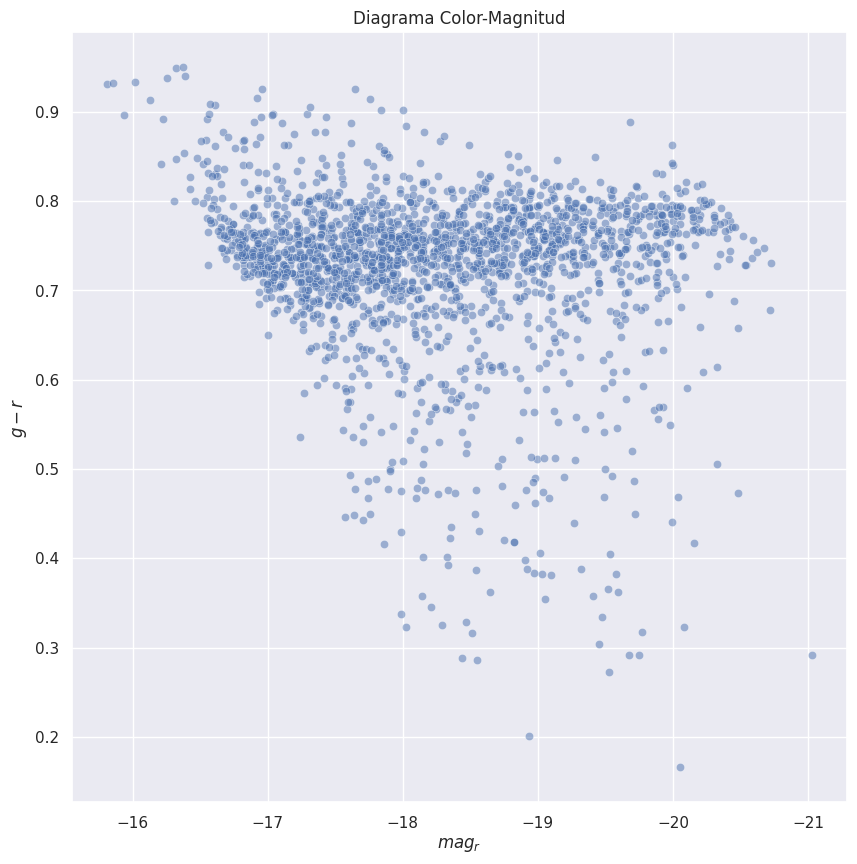

In [ ]:

mag_g = data['magg']
masked_greater_equalr = data['magr']

# Calculamos el valor g-r que nos ayudará con la clasificación morfológica.

gr = mag_g-mag_r

#Veamos el diagrama general
plt.figure(1)
plt.title('Diagrama Color-Magnitud')
sns.scatterplot(data,x=mag_r,y=gr,alpha=0.5)
plt.gca().invert_xaxis()
plt.xlabel('$mag_r$')
plt.ylabel('$g-r$')




In [ ]:
data

,ngal,x,y,z,r,vx,vy,vz,mstar,mvir,mbulge,magg,magr
0,1,-0.400,0.112,-1.360,1.422,-116.152,347.398,1396.637,0.264,3.065,0.000,-16.925,-17.679
1,2,-0.099,-0.087,-0.585,0.600,-4.521,-2675.145,-1285.704,0.187,4.009,0.000,-16.512,-17.280
2,3,-0.162,-0.283,0.646,0.723,-61.448,-467.275,906.527,0.120,2.712,0.000,-16.068,-16.825
3,4,-0.165,0.724,0.114,0.751,-454.766,2311.390,-153.633,0.162,1.061,0.000,-16.646,-17.355
4,5,-0.192,-0.604,0.387,0.742,706.291,1117.466,948.637,0.199,5.541,0.000,-16.069,-16.941
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,2012,1.544,2.114,-1.087,2.834,-982.501,-106.264,1124.119,0.773,8.724,0.109,-18.432,-19.170
2012,2013,0.725,0.986,-1.227,1.733,-472.867,-441.583,-2925.550,2.184,7.663,1.327,-19.334,-20.097
2013,2014,-0.218,-0.401,-0.454,0.644,847.750,1749.124,3041.940,0.684,4.598,0.620,-18.326,-19.044
2014,2015,-0.127,-2.082,0.177,2.093,829.687,1127.472,1214.882,0.867,4.126,0.692,-18.575,-19.304


In [ ]:
mask_gr

0       True
1       True
2       True
3       True
4       True
        ... 
2011    True
2012    True
2013    True
2014    True
2015    True
Length: 2016, dtype: bool

Text(0.5, 1.0, 'Diagrama Color-Magnitud')

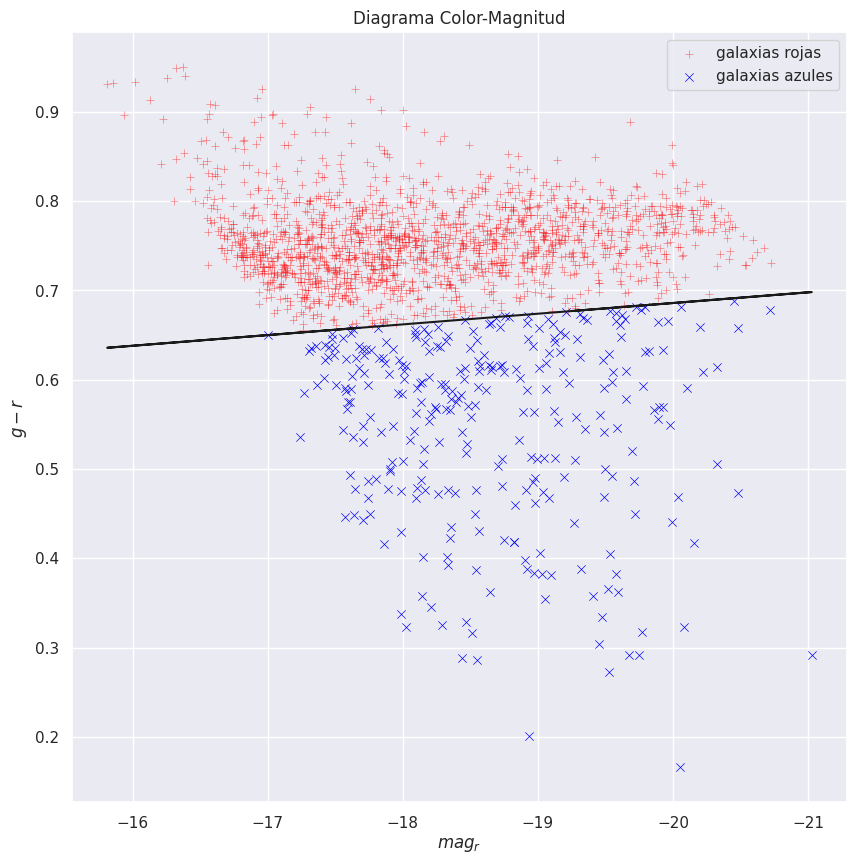

In [ ]:
#A partir de este gráfico gr vs. r vamos a separar las galaxias que sean más rojas
# de las galaxias que no (las más azules).

#Estas variables se seleccionaron a "ojo" buscando que de un buen corte.
x12 = -22.01
y12 = 0.71
x22 = -19.086
y22 = 0.675

A = (y22-y12)/(x22-x12)
B = -A*x12+y12

color_cut = A*mag_r+B
mask_gr   = gr>color_cut

#Ploteamos separando entre galaxias rojas y azules

sns.scatterplot(data[mask_gr],x=mag_r[mask_gr],y=gr[mask_gr],color='red', marker='+',alpha=0.5,label='galaxias rojas')
sns.scatterplot(data[~mask_gr],x=mag_r[~mask_gr],y=gr[~mask_gr],color='blue', marker='x',label='galaxias azules')
plt.plot(mag_r,color_cut,'k-')
plt.gca().invert_xaxis()
plt.xlabel('$mag_r$')
plt.ylabel('$g-r$')
plt.title('Diagrama Color-Magnitud')


In [ ]:
data[mask_gr] # no esta agregada la columna sería mas facil trabajar agregando la clasificación

,ngal,x,y,z,r,vx,vy,vz,mstar,mvir,mbulge,magg,magr
0,1,-0.400,0.112,-1.360,1.422,-116.152,347.398,1396.637,0.264,3.065,0.000,-16.925,-17.679
1,2,-0.099,-0.087,-0.585,0.600,-4.521,-2675.145,-1285.704,0.187,4.009,0.000,-16.512,-17.280
2,3,-0.162,-0.283,0.646,0.723,-61.448,-467.275,906.527,0.120,2.712,0.000,-16.068,-16.825
3,4,-0.165,0.724,0.114,0.751,-454.766,2311.390,-153.633,0.162,1.061,0.000,-16.646,-17.355
4,5,-0.192,-0.604,0.387,0.742,706.291,1117.466,948.637,0.199,5.541,0.000,-16.069,-16.941
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,2012,1.544,2.114,-1.087,2.834,-982.501,-106.264,1124.119,0.773,8.724,0.109,-18.432,-19.170
2012,2013,0.725,0.986,-1.227,1.733,-472.867,-441.583,-2925.550,2.184,7.663,1.327,-19.334,-20.097
2013,2014,-0.218,-0.401,-0.454,0.644,847.750,1749.124,3041.940,0.684,4.598,0.620,-18.326,-19.044
2014,2015,-0.127,-2.082,0.177,2.093,829.687,1127.472,1214.882,0.867,4.126,0.692,-18.575,-19.304


Entendiendo que las galaxias rojas son las variables True serian los 1 que te da la variable mask_gr y 0 son las variables false que son las galaxias azules\

,ngal,x,y,z,r,vx,vy,vz,mstar,mvir,mbulge,magg,magr,mask_gr
0,1,-0.400,0.112,-1.360,1.422,-116.152,347.398,1396.637,0.264,3.065,0.0,-16.925,-17.679,1
1,2,-0.099,-0.087,-0.585,0.600,-4.521,-2675.145,-1285.704,0.187,4.009,0.0,-16.512,-17.280,1
2,3,-0.162,-0.283,0.646,0.723,-61.448,-467.275,906.527,0.120,2.712,0.0,-16.068,-16.825,1
3,4,-0.165,0.724,0.114,0.751,-454.766,2311.390,-153.633,0.162,1.061,0.0,-16.646,-17.355,1
4,5,-0.192,-0.604,0.387,0.742,706.291,1117.466,948.637,0.199,5.541,0.0,-16.069,-16.941,1


In [ ]:
# Contar los valores de 0 y 1 en la columna mask_gr
conteo_mask_gr = data['mask_gr'].value_counts()
conteo_mask_gr
#existen 1720 galaxias rojas y 296 azules

mask_gr
1    1720
0     296
Name: count, dtype: int64

##Nuevo dates para trabajar

In [ ]:
galaxias_clasificadas = data
galaxias_clasificadas


,ngal,x,y,z,r,vx,vy,vz,mstar,mvir,mbulge,magg,magr,mask_gr
0,1,-0.400,0.112,-1.360,1.422,-116.152,347.398,1396.637,0.264,3.065,0.000,-16.925,-17.679,1
1,2,-0.099,-0.087,-0.585,0.600,-4.521,-2675.145,-1285.704,0.187,4.009,0.000,-16.512,-17.280,1
2,3,-0.162,-0.283,0.646,0.723,-61.448,-467.275,906.527,0.120,2.712,0.000,-16.068,-16.825,1
3,4,-0.165,0.724,0.114,0.751,-454.766,2311.390,-153.633,0.162,1.061,0.000,-16.646,-17.355,1
4,5,-0.192,-0.604,0.387,0.742,706.291,1117.466,948.637,0.199,5.541,0.000,-16.069,-16.941,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,2012,1.544,2.114,-1.087,2.834,-982.501,-106.264,1124.119,0.773,8.724,0.109,-18.432,-19.170,1
2012,2013,0.725,0.986,-1.227,1.733,-472.867,-441.583,-2925.550,2.184,7.663,1.327,-19.334,-20.097,1
2013,2014,-0.218,-0.401,-0.454,0.644,847.750,1749.124,3041.940,0.684,4.598,0.620,-18.326,-19.044,1
2014,2015,-0.127,-2.082,0.177,2.093,829.687,1127.472,1214.882,0.867,4.126,0.692,-18.575,-19.304,1


De esta forma, nos quedan las dos poblaciones de galaxias: rojas (asociadas a galaxias elípticas con población estrelar vieja) y espirales (asociadas a galaxias azules, formadoras de estrellas).

Text(0, 0.5, 'N')

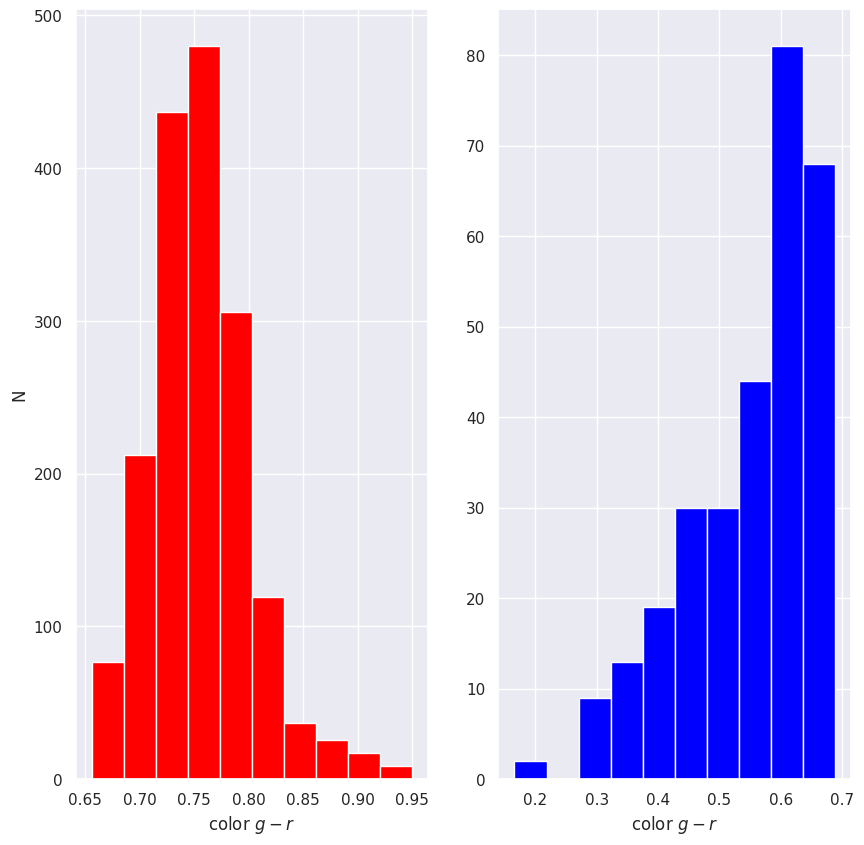

In [ ]:
fig, bxs = plt.subplots(1, 2)
#fig.title('Distribucion de poblaciones de galaxias rojas y azules')
bxs[0].hist(gr[mask_gr],10,color='red',label='Galaxias rojas')
bxs[1].hist(gr[~mask_gr],10,color='blue',label='Galaxias azules')
bxs[0].set_xlabel('color $g-r$')
bxs[1].set_xlabel('color $g-r$')
bxs[0].set_ylabel('N')


Ya sabemos que nuestro cúmulo de galaxia tiene una mayoría predominantes de galaxias rojas. Eso es comparable con las observaciones de cúmulos reales y nos habla de que este sistema se encuentra en un estado de equilibrio.

Veamos cómo se distribuyen espacialmente las galaxias rojas y azules. Como era de esperar, en el centro del cúmulo podemos encontrar galaxias típicamente rojas. Los centros de los cúmulos de galaxias se esperan que estén en un estado de equilibrio hidrodinámico mayor a las zonas más periférocas del cúmulo.
Las galaxias rojas se asocian como galaxias ya evolucionadas y por ello se encuentran en los centros de dichas estructuras.

Text(0, 0.5, 'y')

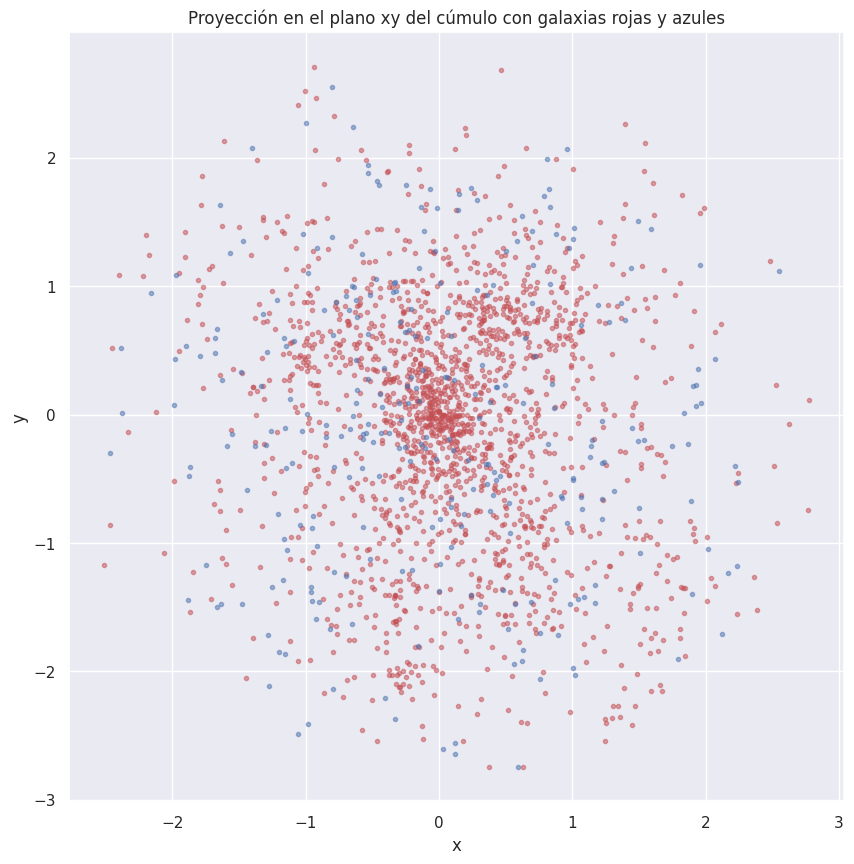

In [ ]:

plt.title('Proyección en el plano xy del cúmulo con galaxias rojas y azules')
plt.plot(x[mask_gr],y[mask_gr],'r.',alpha=0.5,label='galaxias rojas')
plt.plot(x[~mask_gr],y[~mask_gr],'b.',alpha=0.5,label='galaxias azules')
plt.xlabel('x')
plt.ylabel('y')

Veamos ahora los coeficientes de correlación para cada población

In [ ]:
#Para galaxias rojas

data[mask_gr].corr()

,ngal,x,y,z,r,vx,vy,vz,mstar,mvir,mbulge,magg,magr
ngal,1.000000,-0.023772,0.007231,-0.011827,0.057875,0.034425,-0.001406,0.041346,0.440977,0.231849,0.378819,-0.391682,-0.395240
x,-0.023772,1.000000,-0.120898,-0.069375,0.118251,-0.178812,0.077734,-0.126584,-0.040114,-0.065028,-0.011819,0.053529,0.053473
y,0.007231,-0.120898,1.000000,-0.206687,-0.133714,0.151584,-0.150485,-0.091463,0.017857,0.055213,-0.020880,-0.008524,-0.009856
z,-0.011827,-0.069375,-0.206687,1.000000,-0.141294,-0.187923,0.100567,0.119431,-0.013759,-0.051551,0.013229,0.016893,0.017402
r,0.057875,0.118251,-0.133714,-0.141294,1.000000,-0.034153,0.021595,-0.096240,0.045398,0.189749,0.004475,-0.121481,-0.111316
vx,0.034425,-0.178812,0.151584,-0.187923,-0.034153,1.000000,-0.158795,-0.178016,0.030251,0.028834,0.013647,-0.012199,-0.014725
vy,-0.001406,0.077734,-0.150485,0.100567,0.021595,-0.158795,1.000000,-0.024371,-0.026534,-0.032948,-0.010408,-0.006349,-0.002925
vz,0.041346,-0.126584,-0.091463,0.119431,-0.096240,-0.178016,-0.024371,1.000000,0.033604,0.004066,0.024344,-0.021415,-0.021030
mstar,0.440977,-0.040114,0.017857,-0.013759,0.045398,0.030251,-0.026534,0.033604,1.000000,0.529385,0.868352,-0.862371,-0.873177
mvir,0.231849,-0.065028,0.055213,-0.051551,0.189749,0.028834,-0.032948,0.004066,0.529385,1.000000,0.226375,-0.441892,-0.447139


Podemos notar que para el caso de galaxias rojas, hay un mejor coeficiente de correlación (en valor absoluto) entre la magnitud $mag_r$ y la masa estelar $M_{star}$ que para el caso general en el que tomábamos a todas las galaxias. Esto quiere decir que para valores más grandes de $mag_r$ menor valor de $M_{star}$, lo que físicamente es análogo a decir que mientras más brillante sea una galaxia (valores más chicos o "negativos" de $mag_r$) más masa estelar tiene esa galaxia.